## Исследование данных о российском кинопрокате




Нам необходимо изучить рынок российского кинопроката и выявить текущие тренды. 
Уделим внимание фильмам, которые получили государственную поддержку. 
Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/mkrf_movies.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


В обоих датафреймах есть столбец 'puNumber'. Нам необходимо объединить две таблицы, но тип данных у данного столбца разный. Приведем тип данных столбца 'puNumber' в числовой

При попытке перевода выдает ошибку - наличие ячейки со значением 'нет'. Переведем ее в 0.

In [3]:
df.loc[df['puNumber'] == 'нет', 'puNumber'] = 0

In [4]:
df['puNumber'] = df['puNumber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
data = df.merge(df2, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Все получилось, данные не потерялись

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Типы данных проверены выше. Что мы имеем.

Дата премьеры фильма show_start_date - переведем в значение дата/время

Рейтинг фильма на кинопоиске - ratings - переведем в тип 'float'

In [6]:
data['show_start_date']=pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


При переводе столбца рейтинг фильма в числовой формат, выяснилось, что некоторые значения указаны в процентах. Разберемся с ними

In [7]:
data['ratings'].loc[data['ratings'].str.find('%') != -1].count()


29

Из 6500 строк рейтинга, имеем 29 строк с процентами. Исключим данные значения

In [8]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data.sort_values(by = 'ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3515,Взломать блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.0,25000000.0,36016269.0,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0
4678,Мантикора.,111011510,2010-12-17 12:00:00,Художественный,"ООО ""Студия спецэффектов ""Ацидум""",Россия,Вл.Китт,В.Музыченков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.1,триллер,NaN
1535,Кавказ.,111009413,2013-11-26 12:00:00,Художественный,"Юнайтед Мультимедиа Проджектс, Метрополь",Азербайджан-Россия,Фарид Гумбатов,"Рауф Атамалибеков, Фарид Гумбатов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.1,комедия,NaN
4794,Приключения в тридесятом царстве.,111006610,2010-06-18 12:00:00,Художественный,"ООО Киностудия ""ЮНОСТЬ""",Россия,В.Ивановская,В.Бердочкин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.2,"детский,фэнтези,приключения",24978.0
4014,Кукарача 3D,114000111,2011-03-10 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,А.Адилханян,Г.Нерсисян,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.3,"мультфильм,комедия",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Тип столбцов изменен:
    
    show_start_date - тип заменен на формат дата/время
    
    ratings  - рейтинг в вещественном формате чисел

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [10]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [11]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


Что мы видим из этой выборки пропусков:
    
   1. Из общей выборки всего 332 фильма сняты с помощью государственного финансирования. Остальные 7154 - нет. Так как тип столбца - формат float, логично предположить, что все пропуски выражены Nan, которые могут участвовать в математических операциях. То есть столбцы **refundable_support**, **nonrefundable_support**, **budget**, **financing_source** замена пропусков в категориальных значениях не требуется, так как они неслучайные.
   
   2. Строки в столбцах **production_country**, **director**, **film_studio** с 2, 9 и 17 пропусками удалим, как незначительные пропуски.
   
   3. Пропущенные значения в столбце рейтинг можно заменить средним арифметическим, так как разброс данных небольшой.
   
   4. Столбец жанр - пропущенные значения так просто ничем не заменишь, тип категориальный, значений много. Оставим их как есть. Попробуем заменить хотя бы мультфильмы, их несложно думаю будет отыскать. По студии производителю - Никелодеон, Анимаккорд и возраст 0+.
   
   

Удалим пропуски в столбцах production_country, director, film_studio и проверим что из этого вышло

In [12]:
data = data.dropna(subset =['production_country', 'director', 'film_studio']).reset_index(drop=True)
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
ratings                   977
genres                    957
box_office               4304
dtype: int64

Также уберем значение Nan в категориальной переменной столбца producer

In [13]:
data['producer'] = data['producer'].fillna(value='')
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
ratings                   977
genres                    957
box_office               4304
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [14]:
data.duplicated().sum()

0

Полных дубликатов не выявлено

In [15]:
idx = data.loc[data.duplicated(subset=['title'])].index
idx

Int64Index([   3,    4,   41,  110,  113,  122,  132,  205,  268,  379,
            ...
            7254, 7262, 7274, 7286, 7295, 7342, 7389, 7411, 7423, 7447],
           dtype='int64', length=713)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7459 entries, 0 to 7458
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7459 non-null   object        
 1   puNumber               7459 non-null   int64         
 2   show_start_date        7459 non-null   datetime64[ns]
 3   type                   7459 non-null   object        
 4   film_studio            7459 non-null   object        
 5   production_country     7459 non-null   object        
 6   director               7459 non-null   object        
 7   producer               7459 non-null   object        
 8   age_restriction        7459 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Выявлено 713 дубликатов - 10% выборки. 
Причина по которой могли образоваться дублирующие строки:

1. Объединение двух датафреймов. 

2. Наличие нескольких прокатных удостоверений на 1 фильм.

Мы заранее не можем знать какие конкретно данные содержит каждый из датафреймов, поэтому подчистим повторяющиеся значения фильмов

In [17]:
data.drop(idx).reset_index(drop=True)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6742,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
6743,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6744,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data = data.sort_values(
    by = 'box_office',
    ascending = False
    ).drop_duplicates(
    subset=['title'])
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
6793,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2.576614e+09
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09
3484,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2.118396e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7456,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверим еще один столбец на уникальность

In [19]:
data['puNumber'].duplicated().sum()

0

Удалим 2 найденных дубликата

In [20]:
data = data.drop_duplicates(subset=['puNumber'])
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
6793,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2.576614e+09
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09
3484,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2.118396e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7456,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>


    Насколько я вижу, в столбцах по разному написаны Фамилия/Имя режиссёров (столбец **director**) и продюсеров (столбец **producer**), с сокращениями и без. В названиях фильмов (столбец **title**) также появляются непредсказуемые знаки препинания. Обобщим - разные методы написания/сокращения названий.

Поработаем со столбцом Жанр. Заменим пропуски на значение **не указан**

In [21]:
data['genres'] = data['genres'].fillna(value = 'не указан')
data['genres'].value_counts()

не указан                       949
драма                           448
комедия                         328
мелодрама,комедия               181
драма,мелодрама                 170
                               ... 
военный,детектив                  1
комедия,фэнтези,ужасы             1
мелодрама,триллер,история         1
фантастика,боевик,семейный        1
короткометражка,боевик,драма      1
Name: genres, Length: 742, dtype: int64

Исправим проблемные значения в поле type

In [22]:
data['type'] = data['type'].str.strip()
data['type']

7429    Художественный
5642    Художественный
6793    Художественный
6526    Художественный
3484    Художественный
             ...      
7454            Прочие
7455    Художественный
7456    Художественный
7457      Анимационный
7458      Анимационный
Name: type, Length: 6746, dtype: object

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Для начала заменим пропуски в столбцах с бюджетом на нули

In [23]:
data['budget'] = data[['budget','refundable_support','nonrefundable_support']].fillna(0)
data.sort_values(by='budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
320,Халк,221038716,2016-10-10 12:00:00,Художественный,Юниверсал Пикчерз,США,Энг Ли,"Ларри Франко, Гейл Энн Хард",«16+» - для детей старше 16 лет,NaN,NaN,0.000000e+00,NaN,6.2,"фантастика,боевик",NaN
2192,Библиотекарь.,111000215,2015-01-14 12:00:00,Художественный,"ООО ""Россфильм""",Россия,Т.Воронецкая,Е.Белова,«16+» - для детей старше 16 лет,NaN,NaN,0.000000e+00,NaN,6.7,"фэнтези,боевик,триллер",NaN
2185,ДРАКУЛА,121018114,2014-08-07 12:00:00,Художественный,"Юниверсал Пикчерз, Леджендари Пикчерз, Майкл Д...",США,Гари Шор,"Джон Дж.Джашни, Джозеф М.Карачиоло младший, Ма...",«12+» - для детей старше 12 лет,NaN,NaN,0.000000e+00,NaN,7.8,"ужасы,фэнтези,мелодрама",NaN
2184,Одна миллиардная доля,121018014,2014-08-07 12:00:00,Художественный,"Бенаройа Пикчерз, Мискеланиос Интертейнмент, П...",США,Брайан Хориути,"Майкл Бенаройа, Дэвид Диксон, Кевин Скотт Фрайкс",«16+» - для детей старше 16 лет,NaN,NaN,0.000000e+00,NaN,4.8,"фантастика,драма,мелодрама",NaN
2182,Доктор Кто: Глубокий вдох,121017814,2014-08-07 12:00:00,Художественный,"Би-Би-Си, Эс Бэ Эс",Великобритания,Бен Уитли,"Брайан Минчин, Стивен Моффат",«12+» - для детей старше 12 лет,NaN,NaN,0.000000e+00,NaN,7.8,"фантастика,приключения,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.0,300000000.0,6.842005e+08,Фонд кино,6.6,драма,3.642851e+08
7144,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000000.0,7.799420e+08,Министерство культуры,6.9,"драма,биография,история",5.424320e+07
7437,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история,биография,драма",7.177032e+08
5426,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",5.117755e+08


Очень сложно работать с такими нечитаемыми данными. Числовые значения в столбцах **refundable_support**,	**nonrefundable_support**, **budget**, **box_office** переведем в тысячи рублей

In [24]:
data['refundable_support'] = data['refundable_support']/1000
data['nonrefundable_support'] = data['nonrefundable_support']/1000
data['budget'] = data['budget']/1000
data['box_office'] = data['box_office']/1000
data.sort_values(by='budget', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7087,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000.0,90000.0,2305074.303,Фонд кино,5.8,"приключения,фэнтези",333597.05959
5426,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000.0,190000.0,1032905.957,Фонд кино,7.7,"фэнтези,комедия,семейный",511775.54800
7437,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000.0,400000.0,980000.000,Фонд кино,6.0,"история,биография,драма",717703.18553
7144,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000.0,779941.965,Министерство культуры,6.9,"драма,биография,история",54243.20271
3347,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000.0,300000.0,684200.536,Фонд кино,6.6,драма,364285.13960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Пришествие,126002116,2016-04-05 12:00:00,Прочие,"Инди Филм, Магик Хоур Филмз, Мука Фильми Оу, Н...",Дания - Австрия - Ирландия - Финляндия - Норве...,Майкл Мэдсен,Лиз Ленсе-Моллер,«16+» - для детей старше 16 лет,NaN,NaN,0.000,NaN,5.7,ужасы,47.80000
1608,Иллюзия обмана,121014013,2013-05-27 12:00:00,Художественный,"Саммит Интертейнмент, К/О Пепе Продакшн, Си Ми...",Франция-США,Луи Летерье,"Бобби Коэн, Алекс Куртцман, Роберто Орси",«12+» - для детей старше 12 лет,NaN,NaN,0.000,NaN,7.7,"триллер,криминал,детектив",48.30000
5135,"Возвращение в ""А""",111003011,2011-04-14 12:00:00,Художественный,"АО ""Казахфильм"" им.Ш.Айманова, ТОО РПО НПЦ ""Ба...",Россия-Казахстан,Е.Михалков-Кончаловский,"ООО ""ПС ТиВиСи"" Киностудия""",«16+» - для детей старше 16 лет,NaN,NaN,0.000,NaN,6.5,"драма,военный",50.20000
2516,Ромео и Джульетта. Бродвей,126001315,2015-04-27 12:00:00,Прочие,МортуСкрин,США,Давид Лево,"Бонни Камли, Стэфарт Лэйн, Алан Ньюман",«12+» - для детей старше 12 лет,NaN,NaN,0.000,NaN,5.6,мелодрама,50.67240


Столбец budget включает в себя полный объем государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Выведем отдельно строки, в которых бюджет меньше, чем государственная поддержка 

In [25]:
anomal_budget = data.query('refundable_support + nonrefundable_support > budget').copy()
anomal_budget.loc[:,['budget', 'refundable_support', 'nonrefundable_support', 'box_office']]


,budget,refundable_support,nonrefundable_support,box_office
3561,0.0,0.0,250000.000,1.038321e+06
2055,0.0,0.0,75000.000,4.461635e+05
5662,0.0,20000.0,40000.000,2.251964e+05
2469,0.0,10000.0,70000.000,1.965724e+05
2612,0.0,60000.0,100000.000,1.844876e+05
6796,0.0,60000.0,120000.000,1.476068e+05
5795,0.0,10000.0,60000.000,1.065143e+05
5997,0.0,40000.0,40000.000,8.336633e+04
2785,0.0,0.0,35000.000,7.293778e+04
3044,0.0,19000.0,51000.000,7.029905e+04


Бюджет фильма в данных критериях нулевой. Но он как минимум равен сумме поддержки. Заменим эти нулевые начения на сумму поддержки

In [26]:
anomal_budget['budget'].value_counts()

0.0    17
Name: budget, dtype: int64

Всего 17 строк под замену. Заменим значение в данных строчках на сумму поддержки

In [27]:
anomal_budget['budget'] = anomal_budget['refundable_support'] + anomal_budget['nonrefundable_support']

In [28]:
anomal_budget.loc[:,['budget', 'refundable_support', 'nonrefundable_support', 'box_office']]

,budget,refundable_support,nonrefundable_support,box_office
3561,250000.000,0.0,250000.000,1.038321e+06
2055,75000.000,0.0,75000.000,4.461635e+05
5662,60000.000,20000.0,40000.000,2.251964e+05
2469,80000.000,10000.0,70000.000,1.965724e+05
2612,160000.000,60000.0,100000.000,1.844876e+05
6796,180000.000,60000.0,120000.000,1.476068e+05
5795,70000.000,10000.0,60000.000,1.065143e+05
5997,80000.000,40000.0,40000.000,8.336633e+04
2785,35000.000,0.0,35000.000,7.293778e+04
3044,70000.000,19000.0,51000.000,7.029905e+04


In [29]:
data.loc[data['budget'] == 0, 'budget'] = anomal_budget['budget']

Оставим пропуски в рейтингах как есть. Пропуски в жанре заменим на **неизвестный**

In [30]:
data['genres'] = data['genres'].fillna(value = 'неизвестный')

data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       6415
nonrefundable_support    6415
budget                   6415
financing_source         6415
ratings                   969
genres                      0
box_office               3621
dtype: int64

In [31]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,6.746000e+03,331.000000,331.000000,3.310000e+02,5777.000000,3.125000e+03
mean,1.295032e+08,11598.187311,47920.508495,1.289675e+05,6.451895,7.728591e+04
std,3.251101e+07,24476.640236,56868.370604,1.819992e+05,1.111778,2.414901e+05
min,0.000000e+00,0.000000,0.000000,6.000000e+03,1.000000,0.000000e+00
25%,1.120019e+08,0.000000,25000.000000,4.551094e+04,5.800000,1.046450e+02
50%,1.210130e+08,0.000000,30000.000000,7.087617e+04,6.600000,2.430003e+03
75%,1.210370e+08,15000.000000,40000.000000,1.492926e+05,7.200000,2.469584e+04
max,2.310010e+08,180000.000000,400000.000000,2.305074e+06,9.200000,3.073569e+06


<AxesSubplot:>

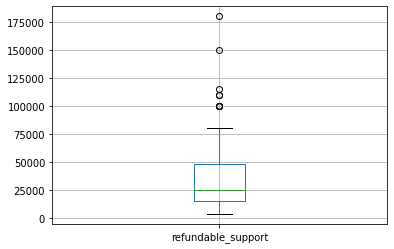

In [32]:
data.query('refundable_support > 0.0').boxplot(column=['refundable_support'])

В столбце refundable_support выбросы минимальны

<AxesSubplot:>

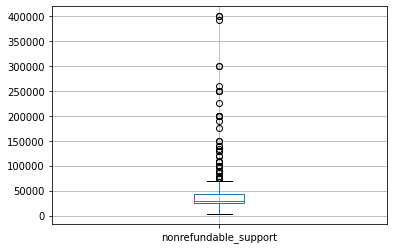

In [33]:
data.query('nonrefundable_support > 0.0').boxplot(column=['nonrefundable_support'])

В столбце nonrefundable_support выбросов уже значительное количество

<AxesSubplot:>

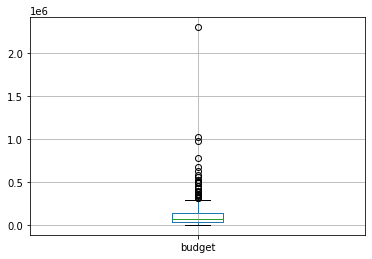

In [34]:
data.query('budget > 0.0').boxplot(column=['budget'])

В столбце budget есть одно аномальное значение, которое очень хочется удалить

In [35]:
data['budget'].max()

2305074.303

In [36]:
data.sort_values(by='budget', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7087,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000.0,90000.0,2305074.303,Фонд кино,5.8,"приключения,фэнтези",333597.05959
5426,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000.0,190000.0,1032905.957,Фонд кино,7.7,"фэнтези,комедия,семейный",511775.54800
7437,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000.0,400000.0,980000.000,Фонд кино,6.0,"история,биография,драма",717703.18553
7144,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000.0,779941.965,Министерство культуры,6.9,"драма,биография,история",54243.20271
3347,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000.0,300000.0,684200.536,Фонд кино,6.6,драма,364285.13960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,не указан,NaN
7455,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7456,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN
7457,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN


<AxesSubplot:>

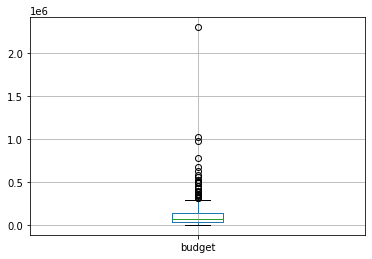

In [37]:
data.query('budget > 0.0').boxplot(column=['budget'])

<AxesSubplot:>

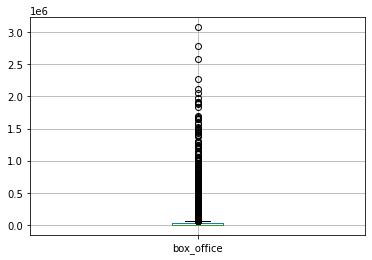

In [38]:
data.query('box_office > 0.0').boxplot(column=['box_office'])

Очень большой разброс данных в столбце **box_office**

Для удобства восприятия информации, уберем в столбцах лишние цифры после запятой, оставив только одну

In [39]:
data[['box_office', 'budget', 'ratings']] = data[['box_office', 'budget', 'ratings']].round(1)
data.sort_values(by='box_office', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,35000.0,160000.0,Фонд кино,6.8,комедия,3073568.7
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000.0,590192.2,Фонд кино,7.5,"спорт,драма",2779686.1
6793,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2576613.8
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,120000.0,563784.7,Фонд кино,6.5,"драма,военный,боевик",2271754.0
3484,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2118396.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,не указан,NaN
7455,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7456,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN
7457,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [40]:
data['show_start_year'] = data['show_start_date'].dt.year
data.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,35000.0,160000.0,Фонд кино,6.8,комедия,3073568.7,2019
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000.0,590192.2,Фонд кино,7.5,"спорт,драма",2779686.1,2017
6793,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2576613.8,2019
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,120000.0,563784.7,Фонд кино,6.5,"драма,военный,боевик",2271754.0,2018
3484,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2118396.1,2017
2856,Зверополис,124000316,2016-02-15 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"мультфильм,комедия,криминал",2048126.1,2016
3751,Тайная жизнь домашних животных. Миньоны против...,124002816,2016-07-05 12:00:00,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,Крис Рено,Кристофер Меледандри,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.7,"мультфильм,короткометражка,комедия",1971005.1,2016
6261,Веном,121022018,2018-10-04 12:00:00,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"боевик,фантастика,триллер",1913257.9,2018
7189,Малефисента: Владычица тьмы,121026219,2019-10-04 12:00:00,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"фэнтези,приключения,семейный",1911944.9,2019
7231,Джокер,121027519,2019-10-03 12:00:00,Художественный,"Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...",США - Канада,Тодд Филлипс,"Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"триллер,драма,криминал",1890368.1,2019


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [41]:
def my_func (column):
    result = column.split(',')[0]
    return result

In [42]:
data['first_value_director'] = data['director'].apply(my_func)
data['first_genres'] = data['genres'].apply(my_func)
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,35000.0,160000.0,Фонд кино,6.8,комедия,3073568.7,2019,К.Шипенко,комедия
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000.0,590192.2,Фонд кино,7.5,"спорт,драма",2779686.1,2017,А.Мегердичев,спорт
6793,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2576613.8,2019,Джо Руссо,фантастика
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,120000.0,563784.7,Фонд кино,6.5,"драма,военный,боевик",2271754.0,2018,А.Сидоров,драма
3484,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2118396.1,2017,Йоаким Реннинг,фэнтези


У нас все отлично получилось. Пришлось конечно попотеть над функцией

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
data['part_full_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data.sort_values(by='part_full_support')


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres,part_full_support
5589,За гранью реальности,111010817,2017-11-27 12:00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,А.Богуславский,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.0,6000.0,136230.3,Министерство культуры,5.2,"приключения,фэнтези",126713.5,2017,А.Богуславский,приключения,0.044043
3728,Танцы насмерть,111013416,2016-08-31 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""ЦЕНТРОКИНО""",Россия,А.Волгин,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.0,6000.0,90278.1,Министерство культуры,4.0,фантастика,9680.7,2016,А.Волгин,фантастика,0.066461
7144,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000.0,779942.0,Министерство культуры,6.9,"драма,биография,история",54243.2,2019,А.Михалков (псевдоним А.Кончаловский),драма,0.076929
7153,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000.0,33000.0,Министерство культуры,8.0,семейный,NaN,2019,А.Попова,семейный,0.090909
3039,Крякнутые каникулы,114003615,2015-12-22 12:00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,40000.0,0.0,399075.3,Фонд кино,5.4,"мультфильм,комедия,приключения",69693.7,2015,В.Лакисов,мультфильм,0.100232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,не указан,NaN,2019,Фил Грабски,не указан,NaN
7455,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7456,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN,2019,Чарльз Е.Бастьен,не указан,NaN
7457,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN,2019,А.Беляев,не указан,NaN


Все необходимые столбцы добавлены

In [44]:
data['part_full_support'] = data['part_full_support'].replace(float('inf'), np.nan)

### Шаг 3. Проведите исследовательский анализ данных


•	Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [45]:
film_for_years = data.groupby('show_start_year').count()
film_for_years['fraction'] = (film_for_years['box_office']/film_for_years['puNumber']).round(2)
film = film_for_years.reset_index().loc[:,['show_start_year','puNumber','box_office','fraction']]
film

,show_start_year,puNumber,box_office,fraction
0,2010,759,101,0.13
1,2011,479,106,0.22
2,2012,524,127,0.24
3,2013,590,183,0.31
4,2014,735,275,0.37
5,2015,671,462,0.69
6,2016,732,512,0.70
7,2017,499,357,0.72
8,2018,865,474,0.55
9,2019,892,528,0.59


Сгруппировав таблицу по годам, видим, что больше всего прокатных удостоверений выдавалось в 2010 и 2019 годах. Долю проката в кинотеатрах вычислили отношением количества кинолент, имеющих сборы в кинотеатрах к общему числу прокатных удостоверений по годам.

Построим графики.


<AxesSubplot:title={'center':'Количество выданных прокатных удостоверений'}, xlabel='show_start_year'>

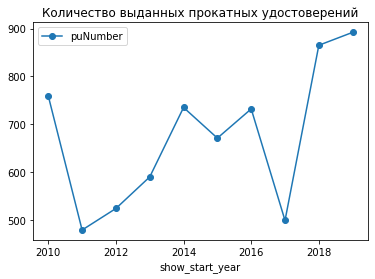

In [46]:
film.plot(x='show_start_year', y='puNumber', style='o-', title='Количество выданных прокатных удостоверений')

В 2017 году в прокат вышло минимальное количество кинолент

<AxesSubplot:title={'center':'Доля государственной поддержки от общего бюджета фильма'}, xlabel='show_start_year'>

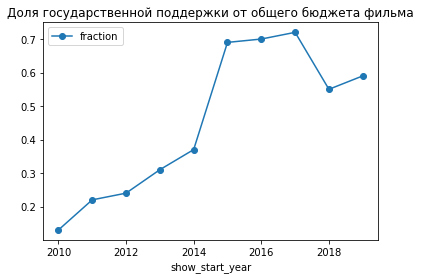

In [47]:
film.plot(x='show_start_year', y='fraction', style='o-', title='Доля государственной поддержки от общего бюджета фильма')

Построив графики, имеем следующие наблюдения. 
В 2017 году более 70% фильмов вышло в прокат в кинотеатры, тогда как в 2010-2013 годах эта доля не превышает и 30%. Цифровизация данных с каждым годом все совершеннее, однако кризисный 2018 год повлиял также и на выход кинокартин в кинотеатрах, при довольно таки высоком количестве прокатных удостоверений.

Полнее всего отражены кинокартины, вышедние в прокат с 2015 по 2017 годы. Более 60% проката - весомая цифра.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [48]:
amount_of_fees = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').reset_index()
amount_of_fees

,show_start_year,box_office
0,2010,2426.1
1,2011,14041.1
2,2012,6911.1
3,2013,29796.8
4,2014,7444935.5
5,2015,39497361.6
6,2016,47865855.9
7,2017,48563707.5
8,2018,49668361.7
9,2019,48425069.9


Построим график, отбросив данные за 2010-2013 год, так как данные для графика не наглядные

<AxesSubplot:title={'center':'Динамика проката по годам'}, xlabel='show_start_year'>

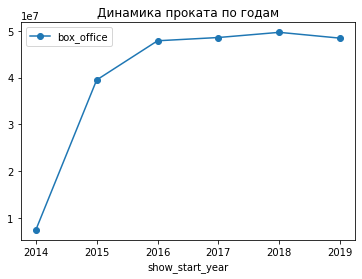

In [49]:
amount_of_fees.loc[4:9].plot(x='show_start_year', y='box_office', style='o-', title='Динамика проката по годам')

В 2010 и 2012 году сборы в рублях были минимальны. Судя по результатам таблицы максимальная сумма за прокат кинокартин выручена в 2018 году. Учитывая данные предыдущего исследования, что в 2018 году произошел резкий спад проката в кинотеатрах, происходит некая нестыковка. Либо данные неполные, либо картины в 2018 году пользовались бешеной популярностью.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [50]:
data_pivot = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean','median']).reset_index()
data_pivot.columns = ['year','mean','median']
data_pivot

,year,mean,median
0,2010,24.020792,1.70
1,2011,132.463208,2.95
2,2012,54.418110,5.60
3,2013,162.824044,3.50
4,2014,27072.492727,20.20
5,2015,85492.124675,5003.45
6,2016,93487.999805,4505.70
7,2017,136032.794118,9968.30
8,2018,104785.573207,8911.55
9,2019,91714.147538,4693.60


Данные за 2010-2013 год незначительны, отбросим их для графика

<AxesSubplot:title={'center':'Средние сборы по годам'}, xlabel='year'>

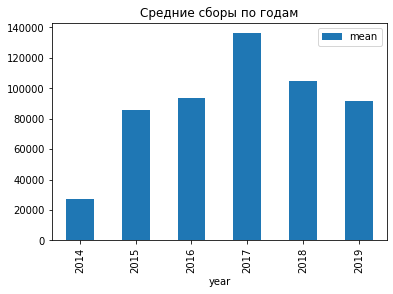

In [51]:
data_pivot.loc[4:9].plot(x='year', y ='mean', kind='bar', title='Средние сборы по годам')

Построим график по медиане сборов по годам

<AxesSubplot:title={'center':'Медиана сборов по годам'}, xlabel='year'>

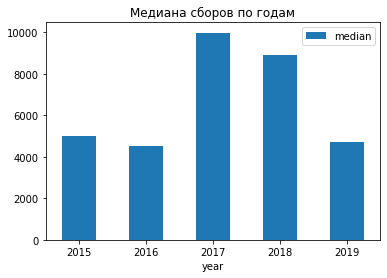

In [52]:
data_pivot.loc[5:9].plot(x='year', y ='median', kind='bar', title='Медиана сборов по годам', rot = 'horizontal')


Разница средней и медианы определяется большим разбросом данных в общей выборке. По медиане сборов также лидирует 2017 год

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [53]:
age_pivot = data.pivot_table(index=['show_start_year','age_restriction'], values='box_office', aggfunc='sum').reset_index()
age_pivot2 = age_pivot.loc[24:48].reset_index(drop=True)
age_pivot2

,show_start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379052.9
1,2015,«12+» - для детей старше 12 лет,13616082.3
2,2015,«16+» - для детей старше 16 лет,11368118.7
3,2015,«18+» - запрещено для детей,5432308.4
4,2015,«6+» - для детей старше 6 лет,8701799.3
5,2016,«0+» - для любой зрительской аудитории,149988.6
6,2016,«12+» - для детей старше 12 лет,12204421.7
7,2016,«16+» - для детей старше 16 лет,16664378.9
8,2016,«18+» - запрещено для детей,6793924.8
9,2016,«6+» - для детей старше 6 лет,12053141.9


<AxesSubplot:title={'center':'2015 год'}, ylabel='age_restriction'>

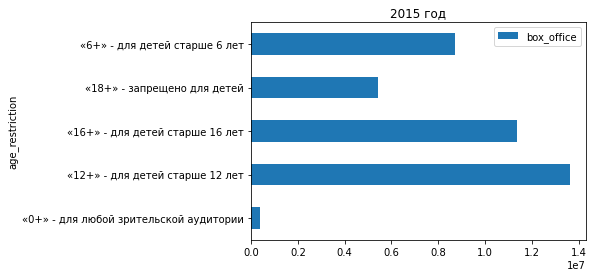

In [54]:
age_pivot2.loc[0:4].plot(x='age_restriction', y='box_office', kind='barh', title='2015 год')

<AxesSubplot:title={'center':'2016 год'}, ylabel='age_restriction'>

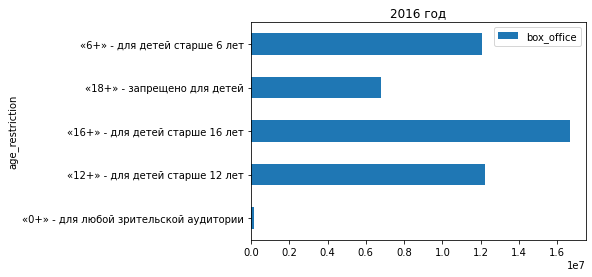

In [55]:
age_pivot2.loc[5:9].plot(x='age_restriction',y='box_office', kind='barh', title='2016 год')

<AxesSubplot:title={'center':'2017 год'}, ylabel='age_restriction'>

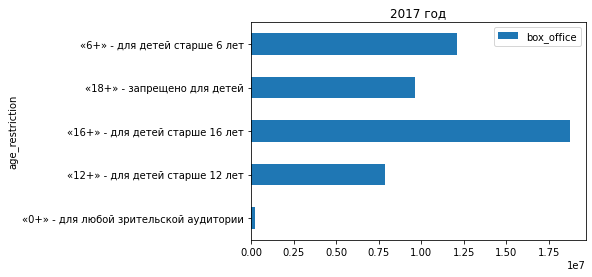

In [56]:
age_pivot2.loc[10:14].plot(x='age_restriction',y='box_office', kind='barh', title='2017 год')

<AxesSubplot:title={'center':'2018 год'}, ylabel='age_restriction'>

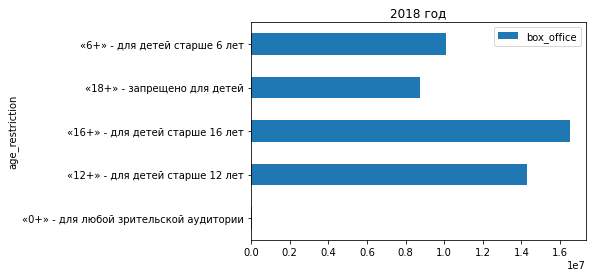

In [57]:
age_pivot2.loc[15:19].plot(x='age_restriction',y='box_office', kind='barh', title='2018 год')

<AxesSubplot:title={'center':'2019 год'}, ylabel='age_restriction'>

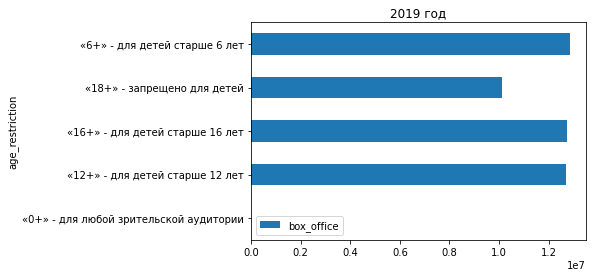

In [58]:
age_pivot2.loc[20:24].plot(x='age_restriction',y='box_office', kind='barh', title='2019 год')

Итак, что мы имеем по диаграммам.

1. Меньше всего денег в прокате собирают фильмы 0+. Мультфильмы в пролете.

2. Из года в год лидируют в прокате фильмы 12+ и 16+. Можно предположить, что основная аудитория кинотеатров - школьники, студенты. Что ж, вполне логично.

3. Фильмы 6+ держатся посерединке. Так свою долю конечно имеют семейные фильмы, на которые можно сходить родителям с детьми. В 2018 году видим небольшую просадку по данной категории фильмов, что может обуславливаться как кризисом 2018 года, так и возможно опять же повторюсь неполными представленными данными за этот год.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Посмотрим сколько выделяют средств на государственную поддержку.

In [59]:
data['full_support'] = data['refundable_support']+data['nonrefundable_support']
data['payback'] = data['box_office']/data['budget']
data2 = data[data['full_support']>0.0]
data2

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres,part_full_support,full_support,payback
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,6.8,комедия,3073568.7,2019,К.Шипенко,комедия,0.375000,60000.0,19.209804
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2779686.1,2017,А.Мегердичев,спорт,0.677745,400000.0,4.709798
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,...,Фонд кино,6.5,"драма,военный,боевик",2271754.0,2018,А.Сидоров,драма,0.319271,180000.0,4.029471
5494,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000.0,...,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037.7,2017,Д.Дьяченко,комедия,0.283706,100000.0,4.695441
5697,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,NaN,не указан,1445731.8,2018,О.Трофим,не указан,0.572062,85000.0,9.729985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,...,Министерство культуры,8.0,семейный,NaN,2019,А.Попова,семейный,0.090909,3000.0,NaN
7202,На Луне,111015519,2019-11-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.6,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,0.604741,35000.0,NaN
7317,Кроличья лапа,111018919,2019-11-20 12:00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,NaN,не указан,NaN,2019,Н.Джорджадзе,не указан,0.628483,30000.0,NaN
7449,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998,30000.0,NaN


In [60]:
data2[data2['payback']>0].sort_values(by='payback',ascending=False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres,part_full_support,full_support,payback
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,6.8,комедия,3073568.7,2019,К.Шипенко,комедия,0.375000,60000.0,19.209804
5697,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,NaN,не указан,1445731.8,2018,О.Трофим,не указан,0.572062,85000.0,9.729985
5738,Я худею,111001618,2018-03-07 12:00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.9,комедия,633462.3,2018,А.Черномазов (псевдоним Алексей Нужный),комедия,0.342274,30000.0,7.227254
3225,"Гуляй, Вася !",111018216,2016-12-20 12:00:00,Художественный,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Россия,Р.Каримов,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский...",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.5,комедия,259099.1,2016,Р.Каримов,комедия,0.649872,25345.0,6.643567
2055,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,6.6,драма,446163.5,2015,Р.Прыгунов,драма,1.000000,75000.0,5.948847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,Простая история .,111011816,2016-07-19 12:00:00,Художественный,"ООО ""КИНОБЮРО""",Россия,В.Татарский,Ю.Бахшиев,«16+» - для детей старше 16 лет,0.0,...,Фонд кино,7.8,"драма,биография",58.7,2016,В.Татарский,драма,0.355556,64000.0,0.000326
2524,Вдвоем на льдине.,111011015,2015-06-25 12:00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.6,мелодрама,4.4,2015,Н.Джорджадзе,мелодрама,0.698403,26500.0,0.000116
2800,Битва с экстрасенсами,111011315,2015-07-20 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.0,...,"Министерство культуры, Фонд кино",5.4,"фэнтези,приключения",6.0,2015,И.Кордзаия,фэнтези,0.434850,25900.0,0.000101
3500,День До,111010916,2016-07-06 12:00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,25000.0,...,Фонд кино,4.8,"драма,фантастика",9.0,2016,А.Котт,драма,0.550523,50000.0,0.000099


In [61]:
data2.dropna(subset=['payback'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres,part_full_support,full_support,payback
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,6.8,комедия,3073568.7,2019,К.Шипенко,комедия,0.375000,60000.0,19.209804
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2779686.1,2017,А.Мегердичев,спорт,0.677745,400000.0,4.709798
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,...,Фонд кино,6.5,"драма,военный,боевик",2271754.0,2018,А.Сидоров,драма,0.319271,180000.0,4.029471
5494,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000.0,...,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037.7,2017,Д.Дьяченко,комедия,0.283706,100000.0,4.695441
5697,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,NaN,не указан,1445731.8,2018,О.Трофим,не указан,0.572062,85000.0,9.729985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,...,Министерство культуры,NaN,не указан,19.8,2015,К.Сухарьков,не указан,0.668963,25000.0,0.000530
3500,День До,111010916,2016-07-06 12:00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,25000.0,...,Фонд кино,4.8,"драма,фантастика",9.0,2016,А.Котт,драма,0.550523,50000.0,0.000099
2800,Битва с экстрасенсами,111011315,2015-07-20 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.0,...,"Министерство культуры, Фонд кино",5.4,"фэнтези,приключения",6.0,2015,И.Кордзаия,фэнтези,0.434850,25900.0,0.000101
2524,Вдвоем на льдине.,111011015,2015-06-25 12:00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.6,мелодрама,4.4,2015,Н.Джорджадзе,мелодрама,0.698403,26500.0,0.000116


Посмотрим поподробнее фильмы, которые окупились полностью

In [62]:
queen_films = data2.query('payback>=1.0').copy()
queen_films


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,first_value_director,first_genres,part_full_support,full_support,payback
7429,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,6.8,комедия,3073568.7,2019,К.Шипенко,комедия,0.375000,60000.0,19.209804
5642,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2779686.1,2017,А.Мегердичев,спорт,0.677745,400000.0,4.709798
6526,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000.0,...,Фонд кино,6.5,"драма,военный,боевик",2271754.0,2018,А.Сидоров,драма,0.319271,180000.0,4.029471
5494,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000.0,...,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037.7,2017,Д.Дьяченко,комедия,0.283706,100000.0,4.695441
5697,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000.0,...,Фонд кино,NaN,не указан,1445731.8,2018,О.Трофим,не указан,0.572062,85000.0,9.729985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000.0,...,Фонд кино,6.2,"комедия,фэнтези",67419.0,2015,Д.Штурманова,комедия,1.000000,20000.0,3.370950
3605,Все о мужчинах,111012716,2016-08-17 12:00:00,Художественный,"ООО ""Фреш-Фильм"", ООО ""Энджой мувиз""",Россия,"Л.Марголин, С.Андреасян, М.Жерневский","С.Андреасян, Г.Андреасян, А.Ананикян, М.Галуст...",«16+» - для детей старше 16 лет,10000.0,...,Фонд кино,4.9,комедия,62260.9,2016,Л.Марголин,комедия,0.638869,20000.0,1.988829
3671,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000.0,...,Фонд кино,5.2,"мультфильм,фэнтези,семейный",55108.0,2017,А.Лукичев,мультфильм,1.000000,40000.0,1.377700
3735,Мифы,111004317,2017-06-07 12:00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,25000.0,...,Фонд кино,4.8,комедия,50451.9,2017,А.Молочников,комедия,1.000000,45000.0,1.121153


In [63]:
queen_films['payback'] = queen_films['payback'].replace(float('inf'), np.nan)

Всего 83 фильма окупились полностью. А Холоп аж в 19 раз!!!!!!!

In [64]:
queen_films.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,part_full_support,full_support,payback
count,7.900000e+01,79.000000,79.000000,79.000000,78.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000
mean,1.114641e+08,20670.886076,63388.132304,160537.591139,6.057692,4.343971e+05,2016.810127,0.576291,84059.018380,2.776245
std,1.081498e+06,27249.427902,77326.759525,141958.953899,1.075889,5.605455e+05,1.485623,0.236813,83868.224732,2.504908
min,1.110001e+08,0.000000,0.000000,6000.000000,2.900000,1.536290e+04,2014.000000,0.129638,6000.000000,1.002547
25%,1.110042e+08,0.000000,26427.500000,70000.000000,5.125000,1.102199e+05,2015.000000,0.410983,35000.000000,1.348007
50%,1.110096e+08,10000.000000,40000.000000,105445.500000,6.200000,2.590991e+05,2017.000000,0.556456,55000.000000,1.988829
75%,1.110193e+08,35000.000000,60000.000000,195033.700000,6.800000,4.489878e+05,2018.000000,0.678872,100000.000000,3.536220
max,1.140088e+08,115000.000000,400000.000000,635283.900000,8.500000,3.073569e+06,2019.000000,1.000000,442104.482000,19.209804


Что мы видим. Средний рейтинг таких супер фильмов = 6 при бюджете 140 млн. рублей, из них половина в качестве государственной поддержки

Посмотрим какие жанры входят в наиболее полюбившиеся зрителям фильмы

In [65]:
queen_films['first_genres'].value_counts()

комедия        31
драма          14
мультфильм     12
военный         3
семейный        3
ужасы           3
фантастика      2
триллер         2
боевик          2
спорт           2
приключения     1
биография       1
фэнтези         1
история         1
не указан       1
Name: first_genres, dtype: int64

<AxesSubplot:xlabel='budget'>

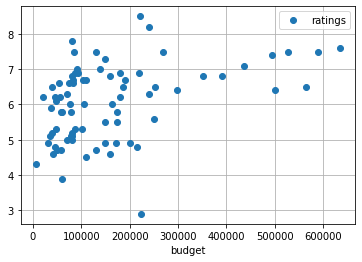

In [66]:
queen_films.plot(x='budget', y='ratings', grid=True, style='o')

Чем больше бюджет фильма, тем солиднее рейтинг. За 600 млн рублей и фильмы отличные! Однако и при бюджете до 200 млн рублей много достойных картин.


<AxesSubplot:xlabel='payback'>

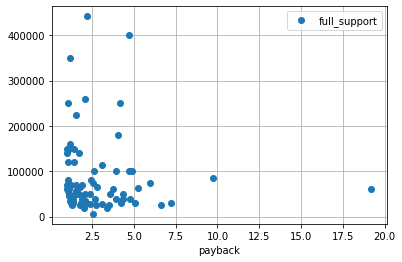

In [67]:
queen_films.plot(x='payback', y='full_support', grid=True, style='o')

Большая часть окупившихся полностью фильмов имела поддержку от государства в размере до 150 млн рублей.

<AxesSubplot:xlabel='ratings'>

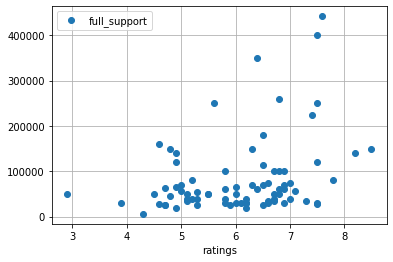

In [68]:
queen_films.plot(x='ratings', y='full_support', grid=True, style='o')

На данном графике видно, что больше половины выборки картин с государственной поддержкой имеют хороший рейтинг (>6.0)

### Шаг 5. Напишите общий вывод

Подведем итоги.

- Из более чем семитысячной выборки фильмов, всего 5% фильмов (318 картин) имели государственную поддержку. Из них 25% (или 83 картины) окупились полностью. 

- Больше половины выборки картин с государственной поддержкой имеют хороший рейтинг (>6.0)

- Количество выделяемых денег поддержки не особо влияет на качество фильма - большее влияние оказывает общий бюджет картины.

- Зрители любят комедии, фильмы 12+ и 16+. 

- Меньше всего денег в прокате собирают фильмы 0+, то есть мультфильмы.

